# Linear Regression

### Using Master datafile

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
path = """/Users/akankshaanand/Downloads/Hospital_Revised_FlatFiles_20161110/"""

path = path.replace("\n","")

In [96]:
master_data = pd.read_csv("/Users/akankshaanand/Downloads/master_file.csv")

In [90]:
master_data.head()

,Unnamed: 0,Provider ID,MORT_30_AMI_score,MORT_30_CABG_score,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,MORT_30_STK_score,PSI_4_SURG_COMP_score,READM_30_AMI_score,...,OP_4_score,PC_01_score,STK_4_score,STK_5_score,STK_6_score,STK_8_score,VTE_1_score,VTE_2_score,VTE_5_score,VTE_6_score
0,0,10001,12.5,4.2,9.3,12.4,15.5,15.4,168.26,16.5,...,NaN,0.0,67.0,98.0,99.0,87.0,97.0,99.0,90.0,0.0
1,1,10005,16.0,NaN,7.6,15.5,20.8,15.5,179.05,16.7,...,99.0,1.0,NaN,99.0,88.0,100.0,95.0,94.0,100.0,NaN
2,2,10006,16.7,4.1,7.1,15.6,18.2,17.9,198.33,16.1,...,NaN,0.0,NaN,99.0,97.0,90.0,98.0,89.0,92.0,0.0
3,3,10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,...,89.0,NaN,NaN,100.0,71.0,NaN,97.0,99.0,NaN,NaN
4,4,10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN


In [97]:
master_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [98]:
master_data.columns

Index(['Provider ID', 'MORT_30_AMI_score', 'MORT_30_CABG_score',
       'MORT_30_COPD_score', 'MORT_30_HF_score', 'MORT_30_PN_score',
       'MORT_30_STK_score', 'PSI_4_SURG_COMP_score', 'READM_30_AMI_score',
       'READM_30_CABG_score', 'READM_30_COPD_score', 'READM_30_HF_score',
       'READM_30_HIP_KNEE_score', 'READM_30_HOSP_WIDE_score',
       'READM_30_PN_score', 'READM_30_STK_score', 'HAI_1_SIR', 'HAI_2_SIR',
       'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR',
       'COMP_HIP_KNEE_score', 'PSI_90_SAFETY_score',
       'H_CLEAN_LINEAR_SCORE_mean', 'H_COMP_1_LINEAR_SCORE_mean',
       'H_COMP_2_LINEAR_SCORE_mean', 'H_COMP_3_LINEAR_SCORE_mean',
       'H_COMP_4_LINEAR_SCORE_mean', 'H_COMP_5_LINEAR_SCORE_mean',
       'H_COMP_6_LINEAR_SCORE_mean', 'H_COMP_7_LINEAR_SCORE_mean',
       'H_HSP_RATING_LINEAR_SCORE_mean', 'H_QUIET_LINEAR_SCORE_mean',
       'H_RECMND_LINEAR_SCORE_mean', 'OP_10', 'OP_11', 'OP_13', 'OP_14',
       'OP_8', 'ED_1b_score', 'ED_2b_score', 'OP_18b_scor

In [99]:
master_data.head()

,Provider ID,MORT_30_AMI_score,MORT_30_CABG_score,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,MORT_30_STK_score,PSI_4_SURG_COMP_score,READM_30_AMI_score,READM_30_CABG_score,...,OP_4_score,PC_01_score,STK_4_score,STK_5_score,STK_6_score,STK_8_score,VTE_1_score,VTE_2_score,VTE_5_score,VTE_6_score
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,168.26,16.5,15.1,...,NaN,0.0,67.0,98.0,99.0,87.0,97.0,99.0,90.0,0.0
1,10005,16.0,NaN,7.6,15.5,20.8,15.5,179.05,16.7,NaN,...,99.0,1.0,NaN,99.0,88.0,100.0,95.0,94.0,100.0,NaN
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,198.33,16.1,15.2,...,NaN,0.0,NaN,99.0,97.0,90.0,98.0,89.0,92.0,0.0
3,10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,NaN,...,89.0,NaN,NaN,100.0,71.0,NaN,97.0,99.0,NaN,NaN
4,10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN


In [100]:
good_columns = round(100 * (master_data.isnull().sum()/len(master_data.index)),2) < 30.00

In [101]:
final_master_df = master_data.loc[:, good_columns]

final_master_df.head()

,Provider ID,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,READM_30_COPD_score,READM_30_HF_score,READM_30_HOSP_WIDE_score,READM_30_PN_score,H_CLEAN_LINEAR_SCORE_mean,H_COMP_1_LINEAR_SCORE_mean,...,H_QUIET_LINEAR_SCORE_mean,H_RECMND_LINEAR_SCORE_mean,OP_10,ED_1b_score,ED_2b_score,OP_18b_score,OP_20_score,IMM_2_score,IMM_3_OP_27_FAC_ADHPCT_score,VTE_1_score
0,10001,9.3,12.4,15.5,21.1,21.4,15.4,18.7,84.0,90.0,...,88.0,90.0,6.4,269.0,68.0,196.0,65.0,97.0,81.0,97.0
1,10005,7.6,15.5,20.8,18.0,21.9,14.9,16.4,83.0,91.0,...,86.0,89.0,13.3,243.0,71.0,117.0,27.0,99.0,83.0,95.0
2,10006,7.1,15.6,18.2,19.8,20.6,15.4,17.9,83.0,91.0,...,86.0,84.0,11.8,217.0,78.0,133.0,10.0,100.0,87.0,98.0
3,10007,9.3,14.4,18.8,19.9,21.1,16.6,17.3,89.0,91.0,...,92.0,86.0,24.3,219.0,68.0,119.0,38.0,99.0,53.0,97.0
4,10008,8.2,12.7,15.7,19.2,23.1,15.7,16.0,NaN,NaN,...,NaN,NaN,3.6,180.0,56.0,98.0,27.0,95.0,43.0,99.0


In [102]:
# Imputation of null values to mean value of their columns
final_master_df.MORT_30_COPD_score.fillna(final_master_df.MORT_30_COPD_score.mean(), inplace = True)

final_master_df.MORT_30_HF_score.fillna(final_master_df.MORT_30_HF_score.mean(), inplace = True)

final_master_df.MORT_30_PN_score.fillna(final_master_df.MORT_30_PN_score.mean(), inplace = True)

final_master_df.READM_30_COPD_score.fillna(final_master_df.READM_30_COPD_score.mean(), inplace = True)

final_master_df.READM_30_HF_score.fillna(final_master_df.READM_30_HF_score.mean(), inplace = True)

final_master_df.READM_30_HOSP_WIDE_score.fillna(final_master_df.READM_30_HOSP_WIDE_score.mean(), inplace = True)

final_master_df.READM_30_PN_score.fillna(final_master_df.READM_30_PN_score.mean(), inplace = True)

final_master_df.H_CLEAN_LINEAR_SCORE_mean.fillna(final_master_df.H_CLEAN_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_COMP_1_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_1_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_COMP_2_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_2_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_COMP_3_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_3_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_COMP_4_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_4_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_COMP_5_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_5_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_COMP_6_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_6_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_COMP_7_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_7_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_HSP_RATING_LINEAR_SCORE_mean.fillna(final_master_df.H_HSP_RATING_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_QUIET_LINEAR_SCORE_mean.fillna(final_master_df.H_QUIET_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_RECMND_LINEAR_SCORE_mean.fillna(final_master_df.H_RECMND_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.OP_10.fillna(final_master_df.OP_10.mean(), inplace = True)

final_master_df.ED_1b_score.fillna(final_master_df.ED_1b_score.mean(), inplace = True)

final_master_df.ED_2b_score.fillna(final_master_df.ED_2b_score.mean(), inplace = True)

final_master_df.OP_18b_score.fillna(final_master_df.OP_18b_score.mean(), inplace = True)

final_master_df.OP_20_score.fillna(final_master_df.OP_20_score.mean(), inplace = True)

final_master_df.IMM_2_score.fillna(final_master_df.IMM_2_score.mean(), inplace = True) 

final_master_df.IMM_3_OP_27_FAC_ADHPCT_score.fillna(final_master_df.IMM_3_OP_27_FAC_ADHPCT_score.mean(), inplace = True)

final_master_df.VTE_1_score.fillna(final_master_df.VTE_1_score.mean(), inplace = True)


/Users/akankshaanand/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [103]:
final_master_df.isnull().sum().max()

0

In [104]:
hospital_ratings = pd.read_csv(path + "/Hospital General Information.csv", encoding = "ISO-8859-1")

hospital_ratings.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


In [105]:
ratings_df = hospital_ratings[['Provider ID', 'Hospital Type','Hospital Ownership','Hospital overall rating']]

In [106]:
ratings_df.columns = ratings_df.columns.str.replace(' ','_')

In [107]:
ratings_df.Hospital_Ownership.astype('category').value_counts()

Voluntary non-profit - Private                 2027
Proprietary                                     799
Government - Hospital District or Authority     567
Voluntary non-profit - Other                    477
Government - Local                              412
Voluntary non-profit - Church                   349
Government - State                               67
Physician                                        66
Government - Federal                             46
Tribal                                            8
Name: Hospital_Ownership, dtype: int64

In [108]:
def get_owner(x):
    if (x == 'Voluntary non-profit - Private'):
        return 'private_non_profit'
    elif(x == 'Proprietary'):
        return 'private'
    elif(x == 'Government - Hospital District or Authority'):
        return 'government'
    elif(x == 'Voluntary non-profit - Other'):
        return 'private_non_profit'
    elif(x == 'Government - Local'):
        return 'government'
    elif(x == 'Voluntary non-profit - Church'):
         return 'private_non_profit'
    elif(x == 'Government - State'):
         return 'government'
    elif(x == 'Physician'):
         return 'private'
    elif(x == 'Government - Federal'):
         return 'government'
    elif(x == 'Tribal'):
         return 'government'
    else:
         return np.nan

In [109]:
ratings_df['Hospital_Ownership'] = ratings_df['Hospital_Ownership'].apply(get_owner)

/Users/akankshaanand/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
ratings_df.head()

,Provider_ID,Hospital_Type,Hospital_Ownership,Hospital_overall_rating
0,10001,Acute Care Hospitals,government,3
1,10005,Acute Care Hospitals,government,3
2,10006,Acute Care Hospitals,government,2
3,10007,Acute Care Hospitals,private_non_profit,3
4,10008,Acute Care Hospitals,private,3


In [111]:
ratings_df.Hospital_Type.astype('category').value_counts()

Acute Care Hospitals         3382
Critical Access Hospitals    1337
Childrens                      99
Name: Hospital_Type, dtype: int64

In [112]:
hospital_type_dumm = pd.get_dummies(ratings_df['Hospital_Type'])

hospital_type_dumm.columns = hospital_type_dumm.columns.str.replace(' ','_') 
hospital_type_dumm.head()

,Acute_Care_Hospitals,Childrens,Critical_Access_Hospitals
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [113]:
ratings_df.drop('Hospital_Type', axis= 1, inplace= True)

/Users/akankshaanand/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [114]:
ratings_df =  pd.concat([ratings_df, hospital_type_dumm], axis = 1)

In [115]:
ownership_dumms = pd.get_dummies(ratings_df['Hospital_Ownership'])

In [116]:
ownership_dumms.head()

,government,private,private_non_profit
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0


In [117]:
ratings_df.drop('Hospital_Ownership', axis= 1, inplace= True)

In [118]:
ratings_df =  pd.concat([ratings_df, ownership_dumms], axis = 1)

In [119]:
ratings_df.head()

,Provider_ID,Hospital_overall_rating,Acute_Care_Hospitals,Childrens,Critical_Access_Hospitals,government,private,private_non_profit
0,10001,3,1,0,0,1,0,0
1,10005,3,1,0,0,1,0,0
2,10006,2,1,0,0,1,0,0
3,10007,3,1,0,0,0,0,1
4,10008,3,1,0,0,0,1,0


In [120]:
ratings_df.isnull().sum().max()

0

In [121]:
final_master_df.columns = final_master_df.columns.str.replace(' ','_')

In [122]:
final_master_df.shape

(4818, 27)

In [123]:
final_master_df =  final_master_df.merge(ratings_df, on = "Provider_ID", how = "inner")

In [124]:
final_master_df.shape

(4818, 34)

In [125]:
final_master_df

,Provider_ID,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,READM_30_COPD_score,READM_30_HF_score,READM_30_HOSP_WIDE_score,READM_30_PN_score,H_CLEAN_LINEAR_SCORE_mean,H_COMP_1_LINEAR_SCORE_mean,...,IMM_2_score,IMM_3_OP_27_FAC_ADHPCT_score,VTE_1_score,Hospital_overall_rating,Acute_Care_Hospitals,Childrens,Critical_Access_Hospitals,government,private,private_non_profit
0,10001,9.300000,12.400000,15.500000,21.10000,21.400000,15.400000,18.700000,84.00000,90.000000,...,97.000000,81.000000,97.000000,3,1,0,0,1,0,0
1,10005,7.600000,15.500000,20.800000,18.00000,21.900000,14.900000,16.400000,83.00000,91.000000,...,99.000000,83.000000,95.000000,3,1,0,0,1,0,0
2,10006,7.100000,15.600000,18.200000,19.80000,20.600000,15.400000,17.900000,83.00000,91.000000,...,100.000000,87.000000,98.000000,2,1,0,0,1,0,0
3,10007,9.300000,14.400000,18.800000,19.90000,21.100000,16.600000,17.300000,89.00000,91.000000,...,99.000000,53.000000,97.000000,3,1,0,0,0,0,1
4,10008,8.200000,12.700000,15.700000,19.20000,23.100000,15.700000,16.000000,87.29333,91.327537,...,95.000000,43.000000,99.000000,3,1,0,0,0,1,0
5,10011,7.400000,13.800000,17.900000,19.60000,19.800000,15.300000,16.700000,81.00000,90.000000,...,83.000000,53.000000,60.000000,2,1,0,0,0,0,1
6,10012,9.200000,12.500000,26.800000,19.20000,23.400000,15.300000,19.400000,86.00000,92.000000,...,100.000000,90.000000,99.000000,3,1,0,0,0,1,0
7,10016,8.100000,14.000000,16.100000,17.90000,21.500000,14.700000,17.100000,79.00000,89.000000,...,98.000000,76.000000,98.000000,3,1,0,0,0,0,1
8,10018,8.082818,12.158015,16.395499,19.99926,21.954575,15.577952,17.111983,87.29333,91.327537,...,39.000000,65.000000,0.000000,Not Available,1,0,0,0,0,1
9,10019,8.700000,12.900000,19.100000,23.00000,22.400000,15.900000,18.300000,83.00000,90.000000,...,98.000000,82.000000,95.000000,2,1,0,0,1,0,0


In [126]:
from sklearn.model_selection import train_test_split

In [127]:
# defining x and y datasets


x = final_master_df.drop(['Provider_ID', 'Hospital_overall_rating'], axis= 1)

y = final_master_df['Hospital_overall_rating']

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [129]:
x_train.shape

(3372, 32)

In [130]:
x_test.shape

(1446, 32)

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [132]:
x_train = scaler.fit_transform(x_train)

/Users/akankshaanand/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/akankshaanand/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [133]:
x_test = scaler.fit_transform(x_test)

/Users/akankshaanand/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/akankshaanand/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [135]:
x_train

array([[ 1.04290836, -0.29229995, -0.09442009, ..., -0.54078574,
        -0.46240988,  0.82063946],
       [ 0.52457412,  2.40120656,  0.63031529, ..., -0.54078574,
        -0.46240988,  0.82063946],
       [ 0.93924151, -1.32217009,  0.11264716, ..., -0.54078574,
        -0.46240988,  0.82063946],
       ...,
       [ 0.62824097, -0.52996229,  1.61388472, ...,  1.84916119,
        -0.46240988, -1.21856192],
       [-0.2010938 , -0.76762463,  1.82095197, ..., -0.54078574,
         2.16258357, -1.21856192],
       [-0.82309488, -0.52996229, -1.3885904 , ..., -0.54078574,
         2.16258357, -1.21856192]])

In [136]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [137]:
#let's apply PCA
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [139]:
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[-1.31004782e-02, -6.25910623e-02, -4.75809928e-03, ...,
        -1.37377584e-02,  2.91870365e-02, -1.09520513e-02],
       [ 4.28925212e-02,  1.53093970e-01,  9.62594728e-02, ...,
         2.69213103e-01,  7.80057235e-02, -2.90301744e-01],
       [-2.06045530e-01, -1.79297689e-01, -5.22346778e-02, ...,
         6.25664458e-02,  1.10336555e-01, -1.39098186e-01],
       ...,
       [ 9.33490220e-03,  2.71402961e-03, -5.46398893e-03, ...,
         3.59330579e-03, -1.16110545e-02,  5.95398128e-03],
       [-1.55891667e-16,  3.55023863e-17,  6.52507940e-17, ...,
         1.73894271e-01,  1.58323474e-01,  2.03804334e-01],
       [ 0.00000000e+00,  6.70347988e-17, -1.68238654e-17, ...,
         5.31050590e-01,  4.83499390e-01,  6.22392050e-01]])

In [140]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([2.77337065e-01, 8.61947270e-02, 7.01638340e-02, 6.21906538e-02,
       5.68768135e-02, 5.18734913e-02, 4.05792717e-02, 3.42447738e-02,
       3.22354408e-02, 2.90365250e-02, 2.67525105e-02, 2.49787836e-02,
       2.16430908e-02, 1.94216588e-02, 1.85621725e-02, 1.78768443e-02,
       1.71711079e-02, 1.62864471e-02, 1.52359531e-02, 1.30759215e-02,
       1.20541888e-02, 1.12756273e-02, 1.02290776e-02, 8.90250442e-03,
       7.27547352e-03, 5.53685555e-03, 5.07536122e-03, 3.51681840e-03,
       3.01523803e-03, 1.38176950e-03, 5.46950920e-32, 2.11644754e-33])

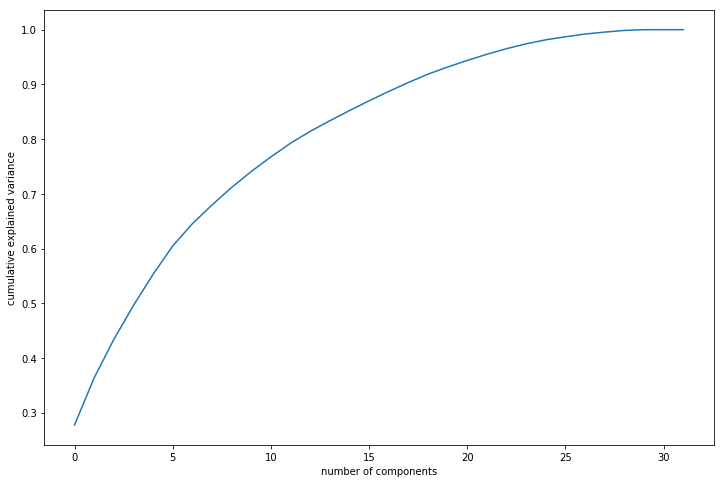

In [142]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [147]:
#Clearly over 90% of the data is properly explained by the first 20 principal components. Let's use them only for our clustering process
#Let's try and check the first six components now
colnames = list(final_master_df.drop(['Provider_ID', 'Hospital_overall_rating'],axis=1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6
0,MORT_30_COPD_score,-0.013100,0.042893,-0.206046,0.033270,0.142444,0.497128
1,MORT_30_HF_score,-0.062591,0.153094,-0.179298,0.013652,0.114679,0.495461
2,MORT_30_PN_score,-0.004758,0.096259,-0.052235,-0.010585,0.147493,0.572001
3,READM_30_COPD_score,0.068683,-0.019906,0.400453,0.026356,-0.140999,0.238986
4,READM_30_HF_score,0.108177,0.027591,0.438424,-0.028827,-0.102342,0.128193
5,READM_30_HOSP_WIDE_score,0.133978,0.002487,0.476929,0.048952,-0.099773,0.115270
6,READM_30_PN_score,0.108844,-0.045586,0.442714,-0.025397,-0.063286,0.134005
7,H_CLEAN_LINEAR_SCORE_mean,-0.255167,-0.013393,0.083528,0.052161,-0.024386,-0.002005
8,H_COMP_1_LINEAR_SCORE_mean,-0.305882,-0.102673,0.097299,0.030005,0.012978,0.026672
9,H_COMP_2_LINEAR_SCORE_mean,-0.272136,-0.013029,0.111232,0.000726,0.074257,0.024215


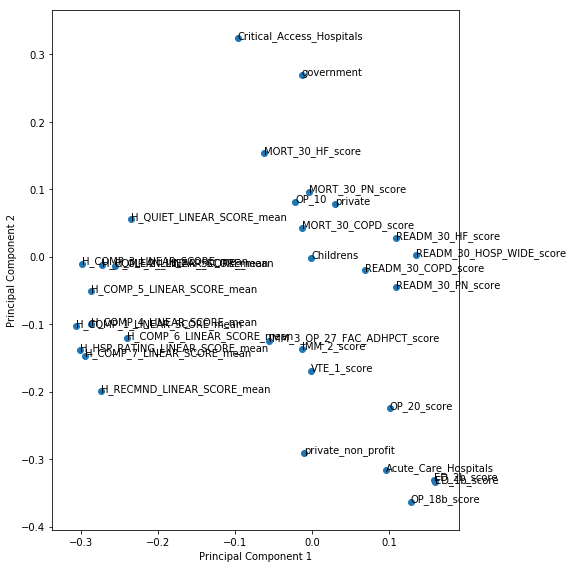

In [150]:
#Let's visualise the first 2 components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [151]:
#We are observing 90% variance with 16 principal components. So let's take the data until that many components
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)

In [152]:
#let's project our original data on the 3 principal components
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(3372, 16)

In [153]:
pc = np.transpose(df_train_pca)
pc

array([[ 2.3231453 , -4.23914271, -0.17948167, ..., -3.77388112,
         0.55962938,  0.48130881],
       [ 0.18638371,  1.7644192 ,  1.39065228, ..., -0.09202992,
        -1.26494447, -0.93117968],
       [-0.289093  , -1.07059083, -1.83883533, ..., -0.442482  ,
         2.39516637, -0.95841406],
       ...,
       [-0.65381519,  1.82811114, -0.04088177, ..., -0.52161395,
        -1.83294759, -0.35184362],
       [ 1.4261708 ,  0.00459958, -0.47244401, ...,  1.20132284,
        -1.66052062, -0.67375423],
       [-0.2872294 , -0.52375106, -0.38686062, ..., -1.039225  ,
        -0.2517938 ,  0.17537196]])

In [158]:
#Let's create the newer matrix according to the given principal components
rownames = list(y_train)
pcs_df2 = pd.DataFrame({'Hospital_overall_rating':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4],'PC6':pc[5],'PC7':pc[6],'PC8':pc[7],'PC9':pc[8]})
pcs_df2.head()

,Hospital_overall_rating,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3,2.323145,0.186384,-0.289093,-1.918907,1.106143,0.667701,0.360154,0.485614,-0.620463
1,2,-4.239143,1.764419,-1.070591,-1.083759,-0.078892,2.369539,-0.117163,0.478016,-1.032931
2,4,-0.179482,1.390652,-1.838835,0.209639,0.251417,-0.449936,-0.261359,0.444773,-0.745469
3,2,-0.846113,1.653592,0.909982,0.588611,1.433450,-1.996388,-0.023719,-0.566515,0.020722
4,Not Available,0.315940,-1.822197,0.302691,-1.816467,-0.628890,-0.310767,1.559917,-0.141966,-0.072337


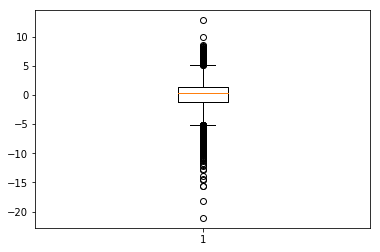

In [159]:
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

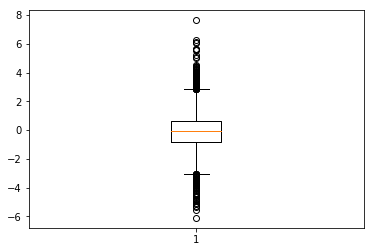

In [160]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
dat3 = pcs_df2[(pcs_df2.PC3 >= Q1 ) & (pcs_df2.PC3 <= Q3)]

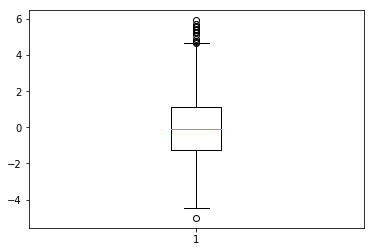

In [161]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

In [162]:
#Outlier analysis is now done.Let's check the data again.
pcs_df2.shape

(2730, 10)

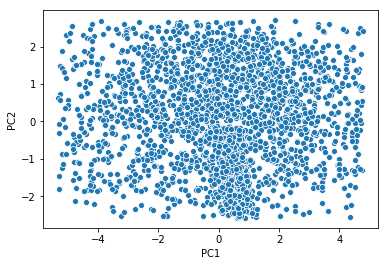

In [163]:
#let's check the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [170]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [171]:
hopkins(pcs_df2.drop(['Hospital_overall_rating'],axis=1))

0.8602049380177483

In [173]:
#0.86 is a good Hopkins score. Hence the data is suitable for clustering. Preliminary check is now done.
#We can do standardisation again or else we can skip this step as well.
dat3 = pcs_df2
dat3_1 = scaler.fit_transform(dat3.drop(['Hospital_overall_rating'],axis=1))

In [ ]:
#K-means Clustering

In [175]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

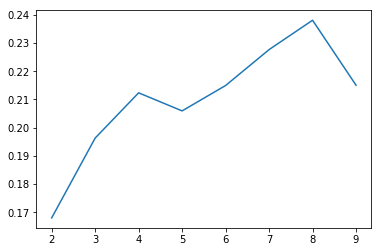

In [176]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

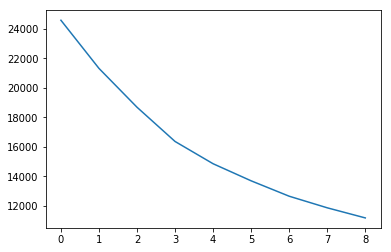

In [177]:
#The sihouette score reaches a peak at around 8 clusters indicating that it might be the ideal number of clusters.
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [191]:
#A distinct elbow is formed at around 6-8 clusters. Let's finally create the clusters and see for ourselves which ones fare better
#K-means with k=5 clusters
model_clus5 = KMeans(n_clusters = 7, max_iter=50)
model_clus5.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [192]:
dat4=dat3
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['Hospital_overall_rating', 'PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','ClusterID']
dat_km.head()

,Hospital_overall_rating,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,ClusterID
0,3,2.323145,0.186384,-0.289093,-1.918907,1.106143,0.667701,0.360154,0.485614,-0.620463,1
1,2,-4.239143,1.764419,-1.070591,-1.083759,-0.078892,2.369539,-0.117163,0.478016,-1.032931,3
2,4,-0.179482,1.390652,-1.838835,0.209639,0.251417,-0.449936,-0.261359,0.444773,-0.745469,6
3,2,-0.846113,1.653592,0.909982,0.588611,1.433450,-1.996388,-0.023719,-0.566515,0.020722,3
4,Not Available,0.315940,-1.822197,0.302691,-1.816467,-0.628890,-0.310767,1.559917,-0.141966,-0.072337,4


In [193]:
dat_km['ClusterID'].value_counts()

6    716
4    521
3    453
1    451
2    431
5     90
0     68
Name: ClusterID, dtype: int64

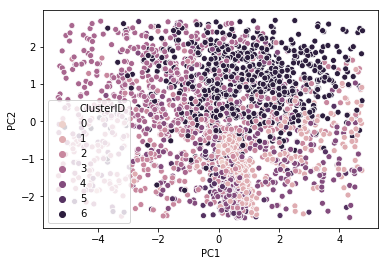

In [197]:
#Each cluster has a good number of Hospital ratings associated with it(at least 5% of the dataset under consideration)
#Let's do some further visualizations.
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

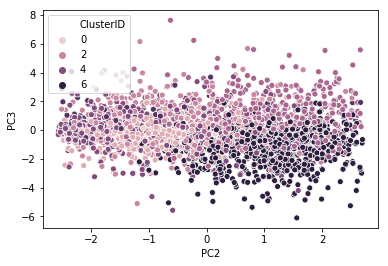

In [198]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=dat_km)

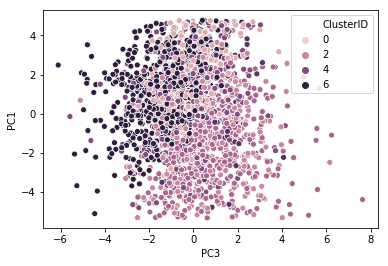

In [199]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=dat_km)